In [1]:
import keras
import os
import numpy as np
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
!mkdir Train
!mkdir Test

!mkdir Train/Fake
!mkdir Train/Real

!mkdir Test/Fake
!mkdir Test/Real

In [3]:
source_dir = "/kaggle/input/signature-verification-dataset/sign_data/train"
target_dir = "/kaggle/working/Train"

os.makedirs(target_dir, exist_ok=True)

for filename in os.listdir(source_dir):
    control = filename.split("_")
    if len(control) > 1 and control[1] == "forg":
        shutil.copytree(os.path.join(source_dir, filename), os.path.join(target_dir, "Fake", filename))
    else:
        shutil.copytree(os.path.join(source_dir, filename), os.path.join(target_dir, "Real", filename))
        

In [4]:
source_dir = "/kaggle/input/signature-verification-dataset/sign_data/test"
target_dir = "/kaggle/working/Test"

os.makedirs(target_dir, exist_ok=True)

for filename in os.listdir(source_dir):
    control = filename.split("_")
    if len(control) > 1 and control[1] == "forg":
        shutil.copytree(os.path.join(source_dir, filename), os.path.join(target_dir, "Fake", filename))
    else:
        shutil.copytree(os.path.join(source_dir, filename), os.path.join(target_dir, "Real", filename))
        

In [5]:
train_dir = os.path.join("/kaggle/working/Train")

test_dir = os.path.join("/kaggle/working/Test")

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(105, 105),
    batch_size=24,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(105, 105),
    batch_size=24,
    class_mode='binary'
)

Found 1649 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [7]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(105, 105, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 103, 103, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 51, 51, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 128)      0

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    verbose=2
)


Epoch 1/30
68/68 - 47s - loss: 0.7345 - accuracy: 0.5102 - 47s/epoch - 689ms/step
Epoch 2/30
68/68 - 45s - loss: 0.6257 - accuracy: 0.6406 - 45s/epoch - 660ms/step
Epoch 3/30
68/68 - 44s - loss: 0.4204 - accuracy: 0.8320 - 44s/epoch - 651ms/step
Epoch 4/30
68/68 - 44s - loss: 0.3041 - accuracy: 0.8837 - 44s/epoch - 654ms/step
Epoch 5/30
68/68 - 44s - loss: 0.2526 - accuracy: 0.9077 - 44s/epoch - 648ms/step
Epoch 6/30
68/68 - 44s - loss: 0.2371 - accuracy: 0.9138 - 44s/epoch - 654ms/step
Epoch 7/30
68/68 - 44s - loss: 0.2515 - accuracy: 0.9065 - 44s/epoch - 644ms/step
Epoch 8/30
68/68 - 44s - loss: 0.2069 - accuracy: 0.9212 - 44s/epoch - 653ms/step
Epoch 9/30
68/68 - 43s - loss: 0.1865 - accuracy: 0.9262 - 43s/epoch - 635ms/step
Epoch 10/30
68/68 - 44s - loss: 0.1737 - accuracy: 0.9311 - 44s/epoch - 652ms/step
Epoch 11/30
68/68 - 44s - loss: 0.1891 - accuracy: 0.9268 - 44s/epoch - 643ms/step
Epoch 12/30
68/68 - 44s - loss: 0.1911 - accuracy: 0.9329 - 44s/epoch - 651ms/step
Epoch 13/30
6

1/1 [==============================] - 0s 304ms/step


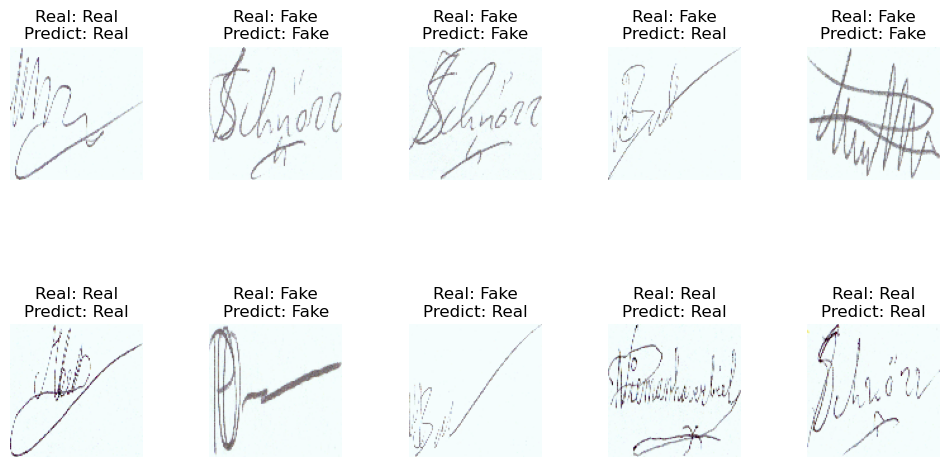

In [9]:

test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)


random_indexes = np.random.choice(len(test_images), size=10, replace=False)
selected_images = test_images[random_indexes]
selected_labels = test_labels[random_indexes]
selected_predictions = predictions[random_indexes]


class_names = ['Real', 'Fake']
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(selected_images[i])
    axes[i].set_title("Real: {}\nPredict: {}".format(class_names[int(selected_labels[i])], class_names[int(selected_predictions[i] > 0.8)]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()